# Assignment 2 - MCMC Methods in Julia
## 200703 - Pranshu Gaur

### QUESTION 1

Let the probability of getting output $1$ be $P$

$P =$ Getting Ouput 1 if $C_1 = 1$ $+$ Getting Ouput 1 if $C_1 = 0$

$$P = \frac{c_y}{c_y + c_x} . [p_y \times 1 + (1 - p_y) \times P] + \frac{c_x}{c_y + c_x} . [p_x \times 0 + (1 - p_x) \times P]$$

$$P. (c_x + c_y) = (p_y.c_y + P.c_y - P.p_y.c_y) + (P.c_x - P.p_x.c_x)$$

$$0 = p_y.c_y - P.p_y.c_y - P.p_x.c_x$$

$$P.(p_x.c_x + p_y.c_y) = p_y.c_y$$

$$P = \frac{p_y.c_y}{p_x.c_x + p_y.c_y}$$ 

Similarly, probability of getting output 0 is $\large{\frac{p_x.c_x}{p_x.c_x + p_y.c_y}}$

Hence, the given algorithm generates a $Bern(\large{\frac{p_y.c_y}{p_x.c_x + p_y.c_y}})$ event

Now, probability of getting an output 0 or 1 in the first iteration is : 

$$P_{out} = \frac{c_y}{c_y + c_x}.p_y + \frac{c_x}{c_y + c_x}.p_x$$

$$P_{out} = \frac{p_x.c_x + p_y.c_y}{c_x + c_y}$$

Therefore average number of iterations to get an output, $\large{N = \frac{1}{P_{out}} = \frac{c_x + c_y}{p_x.c_x + p_y.c_y}}$

### Let us verify this by a simulation.

In [1]:
using Distributions


In [2]:
global const iter = Ref{Float64}(0.0)

iter[] = 1.0

1.0

In [3]:
function Bern(p1,p2,c1,c2)
    U1 = rand(Uniform(0,1))
    i = 0
    c = c2/(c1+c2)
    if (U1<= c)
        U2 = rand(Uniform(0,1))
        if (U2 <= p2)
            return 1
        else
            iter[] = iter[] + 1.0
            return Bern(p1,p2,c1,c2)
        end
    else
        U2 = rand(Uniform(0,1))
        if (U2 <= p1)
            return 0
        else
            iter[] = iter[] + 1.0
            return Bern(p1,p2,c1,c2)
        end
    end
end
            

Bern (generic function with 1 method)

In [4]:
bern_array = []
iterations = []
count = 10000
px = 0.30
py = 0.55
cx = 12
cy = 27
while count>-1
    count = count-1
    iter[] = 1.0
    x = Bern(px,py,cx,cy)
    append!(bern_array,x)
    append!(iterations,iter[])
end

println("Experimental Value of p in Bern(p) distribution is: ", mean(bern_array))
println("Theoretical Value of p in Bern(p) distribution is: ", (py*cy)/(px*cx + py*cy))
println("Experimental Number of Iterations it takes to give an output: ", mean(iterations))
println("Theoretical Number of Iterations it takes to give an output: ", (cx+cy)/(px*cx + py*cy))    

Experimental Value of p in Bern(p) distribution is: 0.7981201879812019
Theoretical Value of p in Bern(p) distribution is: 0.8048780487804877
Experimental Number of Iterations it takes to give an output: 2.120987901209879
Theoretical Number of Iterations it takes to give an output: 2.1138211382113816


***

### QUESTION 2

In [5]:
using Distributions
using StatsPlots

$f(x)$ is as given in the question and $g(x)$ for a **p-dimensional hypercube** is as follows:
$$g(x) = \frac{1}{2^p} .I\{-1 \leq x_i \leq 1\}$$

$$\frac{f(x)}{g(x)} = \frac{2^p.\Gamma (\frac{p}{2} + 1)}{\pi ^{\frac{p}{2}}} I\{||x|| \leq 1\}$$  

$$\leq \frac{2^p.\Gamma (\frac{p}{2} + 1)}{\pi ^{\frac{p}{2}}} = c$$

In [6]:
using SpecialFunctions
function c(p)
    x = gamma(p/2 + 1)
    x = x/(pi^(p/2))
    x = x*(2^p)
    return x
end

function SphereSample(p)
    norm = 0
    p_dim_vec = []
    for i in 1:p
        x = rand(Uniform(-1,1))
        push!(p_dim_vec,x)
        norm = norm + x^2
    end
    if(norm<=1)
        return p_dim_vec
    else
        iter[] = iter[] + 1.0
        return SphereSample(p)
    end
end

SphereSample (generic function with 1 method)

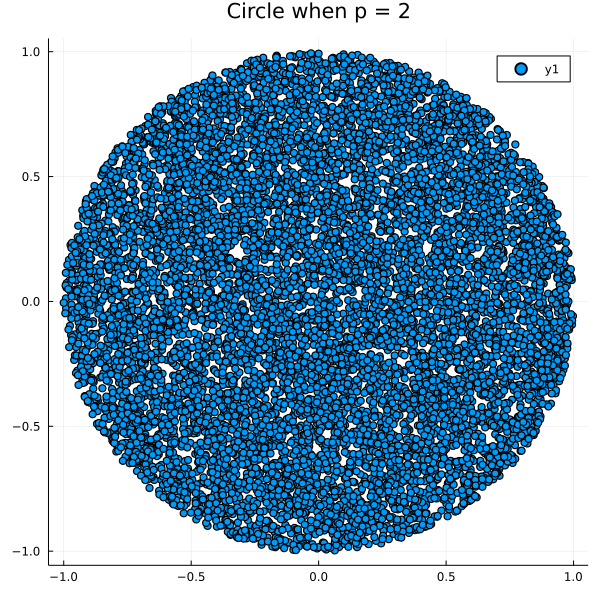

In [7]:
p = 2
sphere_arr = []
iterations = []
global exp_itr = []
global calc_itr = []
x1 = []
y1 = []
count = 10000
    for i in 1:count
        iter[] = 1.0
        
        push!(sphere_arr,SphereSample(p))
        push!(iterations,iter[])
        push!(x1,sphere_arr[i][1])
        push!(y1,sphere_arr[i][2])
    end
push!(exp_itr,mean(iterations))
push!(calc_itr,c(p))
scatter(x1,y1,size=(600,600),title = "Circle when p = 2")

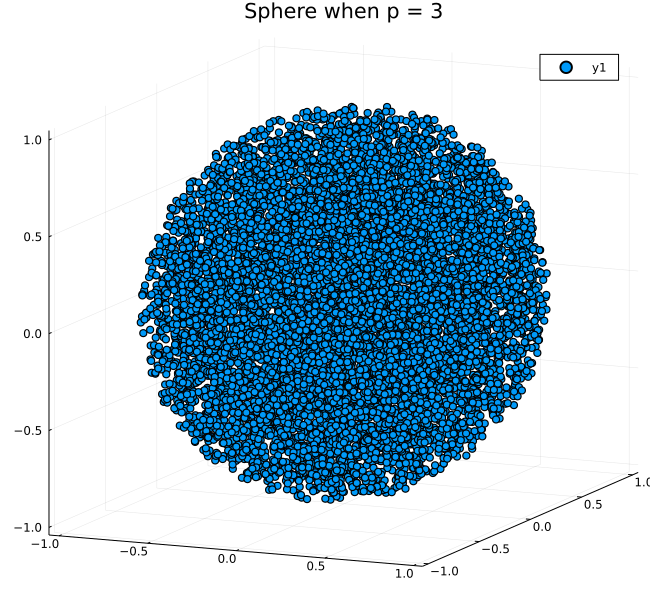

In [8]:
p = 3
sphere_arr = []
iterations = []
x1 = []
y1 = []
z1 = []
count = 10000
    for i in 1:count
        iter[] = 1.0
        
        push!(sphere_arr,SphereSample(p))
        push!(iterations,iter[])
        push!(x1,sphere_arr[i][1])
        push!(y1,sphere_arr[i][2])
        push!(z1,sphere_arr[i][3])
    end
push!(exp_itr,mean(iterations))
push!(calc_itr,c(p))
scatter(x1,y1,z1,size=(650,600,600),title = "Sphere when p = 3")


In [9]:
p = 4
while p<7
    sphere_arr = []
    iterations = []
    count = 10000
        for i in 1:count
            iter[] = 1.0

            push!(sphere_arr,SphereSample(p))
            push!(iterations,iter[])
        end
    push!(exp_itr,mean(iterations))
    push!(calc_itr,c(p))
    p = p + 1
end
println("Value of p   Experimental Avg Iterations   Calculated Avg Iterations")
for i in 2:5
    println("    ",i,"                  ",exp_itr[i-1],"                 ",calc_itr[i-1])
end
println("    ",6,"                  ",exp_itr[5],"                ",calc_itr[5])


Value of p   Experimental Avg Iterations   Calculated Avg Iterations
    2                  1.2799                 1.2732395447351628
    3                  1.8897                 1.909859317102744
    4                  3.1981                 3.242277876554809
    5                  6.0691                 6.0792710185402665
    6                  12.4343                12.384589222348605


As p increases, the number of iterations increase as shown above